# Import Libraries and Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/amazon_reviews_data_clean.csv')

In [ ]:
# Display first few rows

df.head()

,review_id,product_id,product_name,brand,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,date,review length
0,r2lvx0omhfzx0l,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars sounds great,hollywoody,5,i just sent back my jbl flip because it had di...,"reviewed in the united states january 9, 2025",ahcsv6wlxxa2exlwomlmb2fzbkeq,False,0,{},1/9/2025,23
1,r1vf3bhpt5c61n,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars jbl,michael,5,they are a great value. the sound is awesome. ...,"reviewed in the united states january 8, 2025",ahuwzoal676robbd7srer6kyjbka,False,0,{},1/8/2025,11
2,r2yfcrsc298ts7,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars i love it!,william g.,5,"the sound quality is amazing, it’s easy to pai...","reviewed in the united states january 8, 2025",agy6hyebnuxqxea7gpozyzrry3fq,False,0,{},1/8/2025,14
3,r1dkvihxe9rzus,b0d4sx9rc6,beats pill,beats by dre,2.0 out of 5 stars must me rejects from a real...,lady b,2,this speaker must have come from failed qualit...,"reviewed in the united states january 8, 2025",ah3zdvkgdobn2oi6ch5wlvmn3jma,False,0,{},1/8/2025,66
4,rlruivaagz3en,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars a gift for my dad,jacky k.,5,sound quality is good. it can get pretty loud ...,"reviewed in the united states january 8, 2025",afyjoku2nxnz5qcvtjcrgjbfuiva,False,0,{},1/8/2025,26


In [ ]:
# Display data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           700 non-null    object
 1   product_id          700 non-null    object
 2   product_name        700 non-null    object
 3   brand               700 non-null    object
 4   title               700 non-null    object
 5   author              700 non-null    object
 6   rating              700 non-null    int64 
 7   content             700 non-null    object
 8   timestamp           700 non-null    object
 9   profile_id          700 non-null    object
 10  is_verified         700 non-null    bool  
 11  helpful_count       700 non-null    int64 
 12  product_attributes  700 non-null    object
 13  date                700 non-null    object
 14  review length       700 non-null    int64 
dtypes: bool(1), int64(3), object(11)
memory usage: 77.4+ KB


# Calculate the Correlation Matrix

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Display the correlation matrix
print(correlation_matrix)

                 rating  helpful_count  review length
rating         1.000000       0.007650      -0.131176
helpful_count  0.007650       1.000000       0.344824
review length -0.131176       0.344824       1.000000


# Filter Significant Correlations

In [ ]:
# Filter correlations above 0.1 or below -0.1
significant_correlations = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]
print(significant_correlations)

               rating  helpful_count  review length
rating            1.0            NaN            NaN
helpful_count     NaN            1.0            NaN
review length     NaN            NaN            1.0


- No significant correlations between variables in the data

# Visualize Correlations

## Heatmap

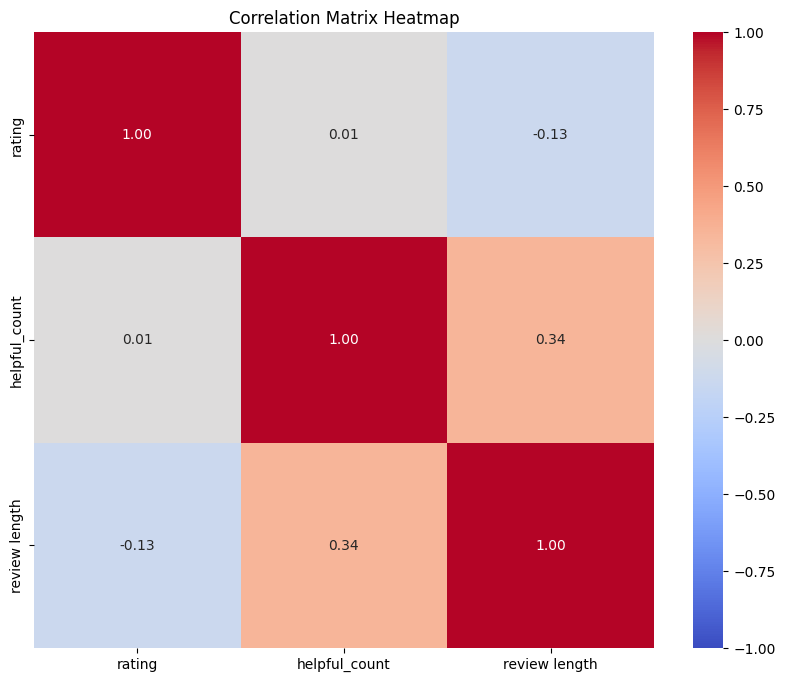

In [ ]:
# Create a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Scatterplots

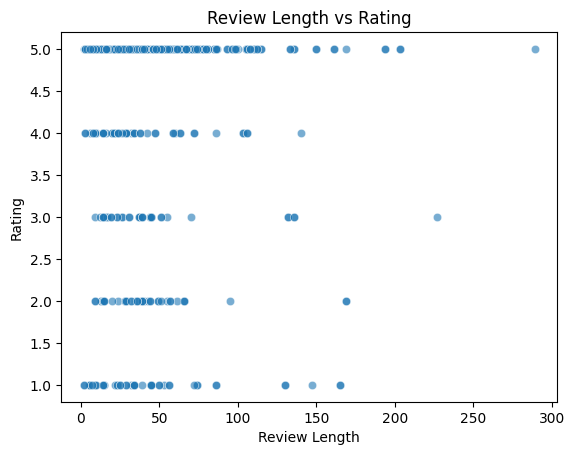

In [ ]:
# Scatter plot for Review Length vs Rating
sns.scatterplot(x='review length', y='rating', data=df, alpha=0.6)
plt.title("Review Length vs Rating")
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.show()

# Insights from Correlation Analysis
- There are **no significant correlations** between the numerical variables in the data.
- The **highest positive correlation is between 'helpful count' and 'review length' which is 0.34**. This indicates that there is some positive relationship with the review length and the amount of other reviewers finding it helpful.
- A longer review would typically be more thorough and have more explanation, so it's likely that other reviewers find it helpful becomes it provides more information.
- A **negative correlation exists between 'review length' and 'rating' (value of - 0.13)**, which shows a negative relationship.
- Longer reviews tend to contain negative comments about a product because customers would have a lot to say about what makes the product bad, and that would be tied to a lower rating.
